<a href="https://colab.research.google.com/github/minhhhhhh/Corona-Virus-Map/blob/main/Corona_Virus_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UTSA CS 3793: Assignment-1

**Last Name - First Name - (abc123)**






## Learning Objectives


*   Read data from a file and Create a graph
*   Implement Uninformed & Informed searching strategies
*   Apply different searching strategies for the given problem
*   Analyze and Compare the searching strategies


## Description

This assignment is focused on **python file reading, graph creation** and implementation of **search algorithms**.
In the following sections, you will complete a series of tasks for a made up problem of *Coronavirus in Texas*.

*   Coronavirus is non-discriminatory, in the sense that it can spread from one city to any other city. The only goal of the virus is to spread to all cities in Texas. Find a possible way for the virus to spread (Uninformed Search).
*   To counter the effect of the virus, vaccine needs to be distributed to all cities. One city has more demand than supply, whereas one city has a shortage of vaccines. The goal is to find an **optimal** strategy to transport the vaccine (Informed Search) from the city with high supply (low demand) to the city with low supply (high demand).

The base structure and comments are provided on what should be done. You can use some libraries that help support you for the successful completion of the assignment. However, you **CANNOT** use a complete library for the search algorithms. You can get pieces of code from online, but please cite the source properly.


#Reading Data Files & Creating a 2D Graph

##(45 points)

In this section, you will write code to read the data files provided, cities.csv and distances.csv, and create a 2D graph consisting of nodes and edges. The goal is to use this graph for the 2 search agents that you will create in the next section.

Provided with this lab, on Blackboard, you will find 2 csv files:

*   **cities.csv** - This file contains a list of coordinates for selected cities in Texas, in the following format:
```
San Antonio,29.4685,-98.5254
```
The above line means that San Antonio is located at the latitude and longitude of 29.4685 N and 98.5254 W respectively. Note that the '-ve' sign denotes 'S' for latitude and 'W' for longitude. While performing calculations you will need to ignore the sign.

*   **distances.csv** - This file contains distance values between two cities of Texas, if a path exists, in the following format:
```
San Antonio,New Braunfels,30.80876734
```
The above line denotes that there should be an edge between *San Antonio* and *New Braunfels* and the weight on that edge, i.e. the distance, is *30.80876734*.

In the code blocks below, handle the logic for the graph. Load the graph data from the give files and display a 2D graph of the given data, with labeled nodes and edges. Create as many functions or code blocks as needed.

##Extra Credit (4 points)

Overlay the 2D graph on an image of the Texas state map.





In [ ]:
# Add only your imports here
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from google.colab import drive
from queue import Queue
import heapq




In [ ]:
# Assume that the data files are in the following folder -- THIS WILL BE USED BY THE TA
drive.mount('/content/gdrive') #Drive mounting to access the .csv files
#Please uncomment and change the path instead of using my local path !

#basePath = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/"

#cities_path = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/cities.csv"
#distances_path = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/distance.csv"
#imagePath = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/texas-map.png"

#Current path for my local machine
cities_path = '/content/gdrive/My Drive/dataPath/cities.csv'
distances_path = '/content/gdrive/My Drive/dataPath/distances.csv'
imagePath = '/content/gdrive/My Drive/dataPath/texas-map.png'

Mounted at /content/gdrive


In [ ]:
# Load the graph data from the files
cities_df = pd.read_csv(cities_path, header=None)
distances_df = pd.read_csv(distances_path)
cities_df.columns = ['City', 'Latitude', 'Longitude'] #Cities.csv give us the city and the coordinate (city,lat,long)
G = nx.Graph() #the graph will be named G for short

# Adding nodes with attributes for each city following the strucutre of cities.csv
for index, row in cities_df.iterrows():
    G.add_node(row['City'], pos=(row['Longitude'], row['Latitude']))

# Adding edges between cities with distances as weights using the data of distance.csv
for index, row in distances_df.iterrows():
    # Adjust column names as per the sturcture in distance.csv (cityA, cityB and distance)
    G.add_edge(row[0], row[1], weight=row[2])


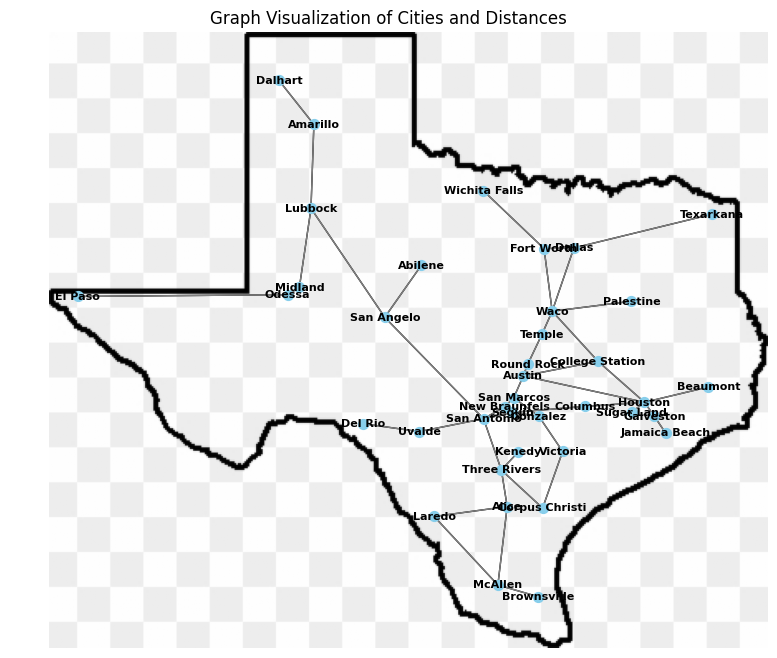

In [ ]:
# Extracting positions from node data of graph
pos = {node: (data['pos'][0], data['pos'][1]) for node, data in G.nodes(data=True)}

# Load and display the Texas state map image
texas_map = plt.imread(imagePath)
plt.figure(figsize=(12, 8))  # Set the figure size for better visibility
plt.imshow(texas_map, extent=[-107, -93, 25, 37])  # Adjust extent to better fit the image with the graph
# plotting the graph on top of the image
nx.draw(G, pos, with_labels=True, node_size=50, node_color="skyblue", font_size=8, font_weight="bold")
nx.draw_networkx_edges(G, pos, edge_color="gray")
plt.title("Graph Visualization of Cities and Distances")
plt.show()


In [ ]:
#All user defined function will be needed

#Function to draw future graph with path
def draw_path(graph, path,imagePath,classification): #classification variable it to determine the plot title
    path = list(path) #changing set() type to list() since 'set' object is not subscriptable
    # Load and display the Texas state map image
    texas_map = plt.imread(imagePath)
    plt.figure(figsize=(12, 8))  # Set the figure size for better visibility
    plt.imshow(texas_map, extent=[-107, -93, 25, 37]) #Set extent so that the map would fit
    pos = nx.get_node_attributes(graph, 'pos')
    #drawing all the nodes (cities) in skyblue
    nx.draw(graph, pos, with_labels=True, node_size=50, node_color="skyblue", font_size=10, font_weight="bold")
    #Draw the edges to the nodes in gray
    nx.draw_networkx_edges(graph, pos, edge_color="gray")
    # Highlighting the selected path in red
    for i in range(len(path) - 1):
        nx.draw_networkx_edges(graph, pos, edgelist=[(path[i], path[i+1])], edge_color='red', width=3)
    if classification == 'bfs': #Classification factor for the path draw (BFS/A*)
      plt.title("Cities visited by the virus spread from 'Three Rivers'") #BFS
    else:
          plt.title("Optimal path for vaccine transportation") #A*
    plt.show()

#This is to calculate eucladian distance from 2 points of the graph given the coordinate, will be used for A* Search
def distanceFormula(city1, city2):
    (x1, y1) = G.nodes[city1]['pos']
    (x2, y2) = G.nodes[city2]['pos']
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5


#Virus Spread - Uninformed Search Agent

##(40 points)

In this section, you will use the graph created in the previous section and create an *uninformed search* agent that will print the path how the virus will spread to all the provided Texas cities. The first confirmed case of the virus was in **Three Rivers** and starts spreading from there. The virus does not discriminate and it needs to spread to all the cities of Texas.

In the following code block, write code to implement **any** uninformed search strategy. You are free to create more code blocks if needed. As the output, print

*   The path or sequence of cities that will be infected by the spread of Coronavirus.
*   The distance travelled by the selected virus spreading strategy.

##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

Cities visited by the virus spread from 'Three Rivers': {'Fort Worth', 'Abilene', 'Jamaica Beach', 'El Paso', 'San Angelo', 'Del Rio', 'Austin', 'New Braunfels', 'Kenedy', 'Texarkana', 'Temple', 'Waco', 'Odessa', 'Columbus', 'San Antonio', 'San Marcos', 'Corpus Christi', 'Houston', 'Sugar Land', 'Laredo', 'Lubbock', 'Palestine', 'Midland', 'Round Rock', 'Dalhart', 'Beaumont', 'Gonzalez', 'Victoria', 'Dallas', 'Wichita Falls', 'Alice', 'Brownsville', 'Amarillo', 'Three Rivers', 'McAllen', 'College Station', 'Seguin', 'Galveston', 'Uvalde'}
Total distance (cost) of the spread: 3359.1268412799996


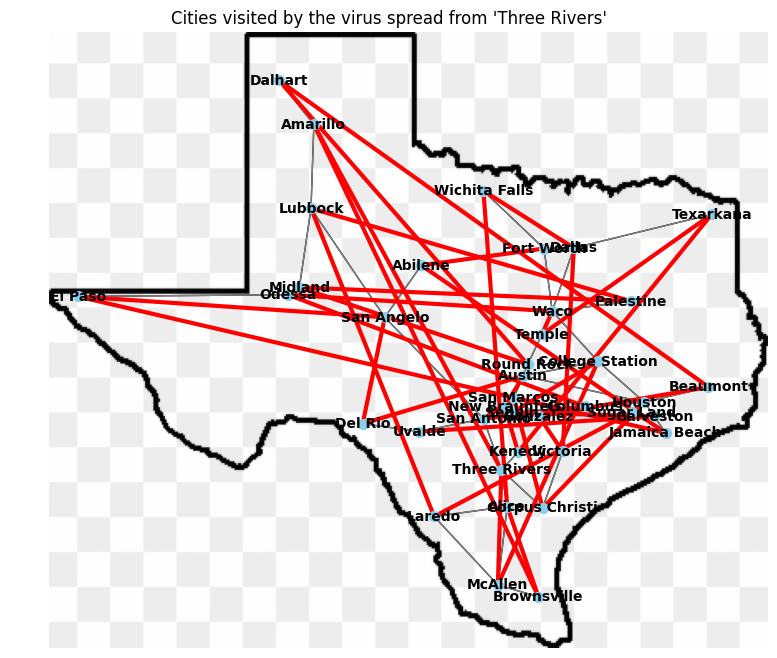

In [ ]:
# Implement ANY uninformed search strategy for the spread of coronavirus from the starting city of 'Three Rivers'
#implementing breadth first search an uninformed search agent
def BFS(graph, start):
    visited = set()  # Keep track of visited nodes, since it is a set there exist no duplicate
    queue = Queue()
    queue.put((start, 0))
    total_cost = 0
    while not queue.empty():
        current_node, current_cost = queue.get()
        if current_node not in visited:
            visited.add(current_node)
            # Add the cost of reaching this node to the total cost
            total_cost += current_cost
            for neighbor in graph.neighbors(current_node):
                if neighbor not in visited:
                    # Calculate the cost to this neighbor
                    edge_weight = graph[current_node][neighbor]['weight']
                    queue.put((neighbor, edge_weight))

    # Check to ensure all cities have been visited
    if len(visited) == len(graph.nodes):
        return visited, total_cost
    else:
        return visited, None

# Driver code and set starting point at (Three Rivers)
start_city = 'Three Rivers'
visited_cities, total_distance = BFS(G, start_city)
print("Cities visited by the virus spread from 'Three Rivers':", visited_cities)
print("Total distance (cost) of the spread:", total_distance)
draw_path(G, visited_cities,imagePath,'bfs')

#Vaccine Transportation - Informed Search Agent

##(40 points)

In this section, you will create an *informed search* agent that will be used to transport the vaccine. The city of **San Antonio** has more supply of vaccine than the demand. The goal is to create an **optimal strategy** to transport the vaccine and make it available at the highly affected city of **College Station**, where there is a shortage of vaccines.

In the following code block, write code to implement an **optimal** informed search strategy. You are free to create more code blocks if needed. As the output, print

*   The path / sequence of cities that will be visited in the optimal vaccine transportation strategy.
*   The total distance travelled in the optimal vaccine transportation strategy.


##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

Optimal path for vaccine transportation: ['San Antonio', 'New Braunfels', 'San Marcos', 'Austin', 'College Station']
Total distance (cost) of the path: 192.07022977114877


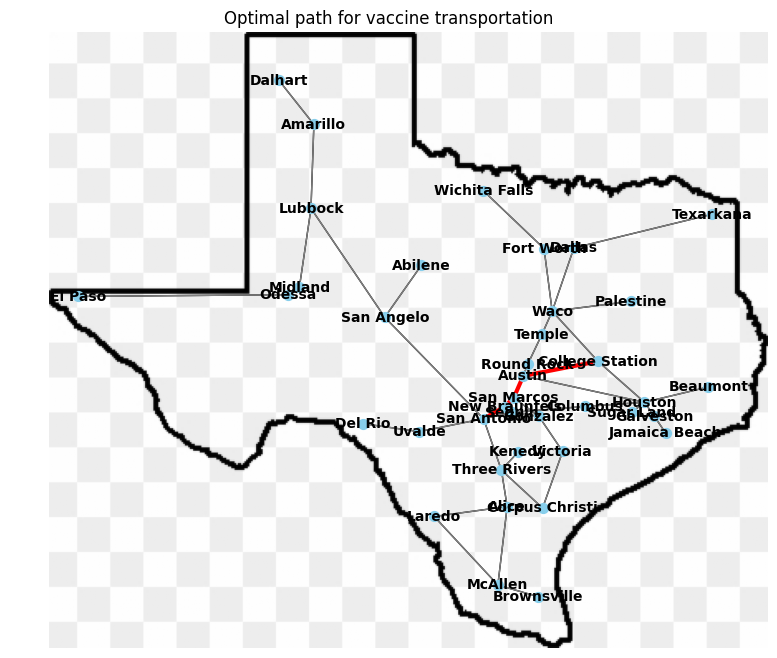

In [ ]:
#Using A* Search algorthim which is an Informed Search Agent
def a_star_search(graph, start, goal):
    priority_queue = []
    heapq.heappush(priority_queue, (0, start, [start]))
    visited = set()
    while priority_queue:
        current_priority, current_node, path = heapq.heappop(priority_queue)
        if current_node == goal:
            return path, current_priority  # Return both path and total cost
        visited.add(current_node)
        for neighbor in graph.neighbors(current_node):
            if neighbor not in visited:
                new_path = list(path)
                new_path.append(neighbor)
                total_cost = current_priority + graph[current_node][neighbor]['weight'] + distanceFormula(neighbor, goal)
                heapq.heappush(priority_queue, (total_cost, neighbor, new_path))
    return None, None

#Driver code
start_city = 'San Antonio'
goal_city = 'College Station'
path, cost = a_star_search(G, start_city, goal_city)
# check if path exist
if path is not None:
    print("Optimal path for vaccine transportation:", path)
    print("Total distance (cost) of the path:", cost)
    draw_path(G, path,imagePath,'AStar')
else:
    print("No path found from", start_city, "to", goal_city)


#Submission Instructions

1.   Complete all tasks above - **File MUST contain the output for ALL cells**
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Upload the .ipynb file on Blackboard

##Rubric

*   (45 points) Reading Data files & Creating a 2D Graph
*   (40 points) Virus Spread - Uninformed Search Agent
*   (40 points) Vaccine Transportation - Informed Search Agent
*   (10 points) Extra Credit - on the Texas map image, overlay the 2D graph and the paths selected by the search agents



